In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
import datetime as dt

In [2]:
df = pd.read_csv('trainbike.csv', parse_dates=True, index_col=0)
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168


In [3]:

#df['datetime'] = pd.to_datetime(df['datetime'])

In [4]:
df.index

DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
               '2011-01-01 02:00:00', '2011-01-01 03:00:00',
               '2011-01-01 04:00:00', '2011-01-01 05:00:00',
               '2011-01-01 06:00:00', '2011-01-01 07:00:00',
               '2011-01-01 08:00:00', '2011-01-01 09:00:00',
               ...
               '2012-12-19 14:00:00', '2012-12-19 15:00:00',
               '2012-12-19 16:00:00', '2012-12-19 17:00:00',
               '2012-12-19 18:00:00', '2012-12-19 19:00:00',
               '2012-12-19 20:00:00', '2012-12-19 21:00:00',
               '2012-12-19 22:00:00', '2012-12-19 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=10886, freq=None)

In [5]:
df.drop(['casual', 'registered','temp'], axis=1, inplace=True)
df

,season,holiday,workingday,weather,atemp,humidity,windspeed,count
datetime,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,14.395,81,0.0000,16
2011-01-01 01:00:00,1,0,0,1,13.635,80,0.0000,40
2011-01-01 02:00:00,1,0,0,1,13.635,80,0.0000,32
2011-01-01 03:00:00,1,0,0,1,14.395,75,0.0000,13
2011-01-01 04:00:00,1,0,0,1,14.395,75,0.0000,1
...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,19.695,50,26.0027,336
2012-12-19 20:00:00,4,0,1,1,17.425,57,15.0013,241
2012-12-19 21:00:00,4,0,1,1,15.910,61,15.0013,168


In [6]:
# let's convert features to category
#df['datetime'] = pd.to_datetime(df['datetime'])

In [7]:
df['season'] = df['season'].astype("category")

In [8]:
df['workingday'] = df['workingday'].astype("category")

In [9]:
#df['months'] = df['months'].astype("category")

In [10]:

# check the data types
df.dtypes

season        category
holiday          int64
workingday    category
weather          int64
atemp          float64
humidity         int64
windspeed      float64
count            int64
dtype: object

In [11]:

#df.set_index
df

,season,holiday,workingday,weather,atemp,humidity,windspeed,count
datetime,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,14.395,81,0.0000,16
2011-01-01 01:00:00,1,0,0,1,13.635,80,0.0000,40
2011-01-01 02:00:00,1,0,0,1,13.635,80,0.0000,32
2011-01-01 03:00:00,1,0,0,1,14.395,75,0.0000,13
2011-01-01 04:00:00,1,0,0,1,14.395,75,0.0000,1
...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,19.695,50,26.0027,336
2012-12-19 20:00:00,4,0,1,1,17.425,57,15.0013,241
2012-12-19 21:00:00,4,0,1,1,15.910,61,15.0013,168


In [12]:
df['months'] = df.index.month
df['months']

datetime
2011-01-01 00:00:00     1
2011-01-01 01:00:00     1
2011-01-01 02:00:00     1
2011-01-01 03:00:00     1
2011-01-01 04:00:00     1
                       ..
2012-12-19 19:00:00    12
2012-12-19 20:00:00    12
2012-12-19 21:00:00    12
2012-12-19 22:00:00    12
2012-12-19 23:00:00    12
Name: months, Length: 10886, dtype: int64

In [13]:
df['day_of_week'] = df.index.dayofweek
df['day_of_week'] 

datetime
2011-01-01 00:00:00    5
2011-01-01 01:00:00    5
2011-01-01 02:00:00    5
2011-01-01 03:00:00    5
2011-01-01 04:00:00    5
                      ..
2012-12-19 19:00:00    2
2012-12-19 20:00:00    2
2012-12-19 21:00:00    2
2012-12-19 22:00:00    2
2012-12-19 23:00:00    2
Name: day_of_week, Length: 10886, dtype: int64

In [14]:
df[df.index<'2011-01-02'].groupby('day_of_week').mean()['count']*24

day_of_week
5    985.0
Name: count, dtype: float64

In [15]:
df[df.index<'2011-01-02']['count'].sum()

985

In [16]:
df['day_of_year'] = df.index.dayofyear
df['day_of_year']

datetime
2011-01-01 00:00:00      1
2011-01-01 01:00:00      1
2011-01-01 02:00:00      1
2011-01-01 03:00:00      1
2011-01-01 04:00:00      1
                      ... 
2012-12-19 19:00:00    354
2012-12-19 20:00:00    354
2012-12-19 21:00:00    354
2012-12-19 22:00:00    354
2012-12-19 23:00:00    354
Name: day_of_year, Length: 10886, dtype: int64

In [17]:
df['hours'] = df.index.hour
df['hours']

datetime
2011-01-01 00:00:00     0
2011-01-01 01:00:00     1
2011-01-01 02:00:00     2
2011-01-01 03:00:00     3
2011-01-01 04:00:00     4
                       ..
2012-12-19 19:00:00    19
2012-12-19 20:00:00    20
2012-12-19 21:00:00    21
2012-12-19 22:00:00    22
2012-12-19 23:00:00    23
Name: hours, Length: 10886, dtype: int64

In [18]:
#datetime - hourly date + timestamp
#season - 1 = spring, 2 = summer, 3 = fall, 4 = winter
#holiday - whether the day is considered a holiday
#workingday - whether the day is neither a weekend nor holiday
#weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
#2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
#temp - temperature in Celsius
#atemp - "feels like" temperature in Celsius
#humidity - relative humidity
#windspeed - wind speed
#casual - number of non-registered user rentals initiated
#registered - number of registered user rentals initiated
#count - number of total rentals

In [19]:
df.dtypes

season         category
holiday           int64
workingday     category
weather           int64
atemp           float64
humidity          int64
windspeed       float64
count             int64
months            int64
day_of_week       int64
day_of_year       int64
hours             int64
dtype: object

In [20]:
df.info

<bound method DataFrame.info of                     season  holiday workingday  weather   atemp  humidity  \
datetime                                                                    
2011-01-01 00:00:00      1        0          0        1  14.395        81   
2011-01-01 01:00:00      1        0          0        1  13.635        80   
2011-01-01 02:00:00      1        0          0        1  13.635        80   
2011-01-01 03:00:00      1        0          0        1  14.395        75   
2011-01-01 04:00:00      1        0          0        1  14.395        75   
...                    ...      ...        ...      ...     ...       ...   
2012-12-19 19:00:00      4        0          1        1  19.695        50   
2012-12-19 20:00:00      4        0          1        1  17.425        57   
2012-12-19 21:00:00      4        0          1        1  15.910        61   
2012-12-19 22:00:00      4        0          1        1  17.425        61   
2012-12-19 23:00:00      4        0         

In [21]:
df.shape


(10886, 12)

<AxesSubplot:xlabel='datetime'>

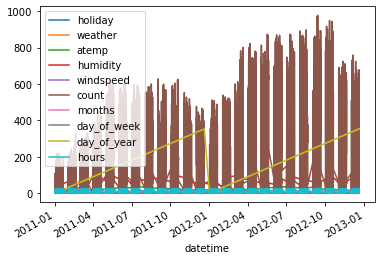

In [22]:
df.plot()

In [23]:
df.count

<bound method DataFrame.count of                     season  holiday workingday  weather   atemp  humidity  \
datetime                                                                    
2011-01-01 00:00:00      1        0          0        1  14.395        81   
2011-01-01 01:00:00      1        0          0        1  13.635        80   
2011-01-01 02:00:00      1        0          0        1  13.635        80   
2011-01-01 03:00:00      1        0          0        1  14.395        75   
2011-01-01 04:00:00      1        0          0        1  14.395        75   
...                    ...      ...        ...      ...     ...       ...   
2012-12-19 19:00:00      4        0          1        1  19.695        50   
2012-12-19 20:00:00      4        0          1        1  17.425        57   
2012-12-19 21:00:00      4        0          1        1  15.910        61   
2012-12-19 22:00:00      4        0          1        1  17.425        61   
2012-12-19 23:00:00      4        0        

In [24]:
df.describe()


,holiday,weather,atemp,humidity,windspeed,count,months,day_of_week,day_of_year,hours
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,0.028569,1.418427,23.655084,61.886460,12.799395,191.574132,6.521495,3.013963,177.562466,11.541613
std,0.166599,0.633839,8.474601,19.245033,8.164537,181.144454,3.444373,2.004585,105.055551,6.915838
min,0.000000,1.000000,0.760000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,0.000000,1.000000,16.665000,47.000000,7.001500,42.000000,4.000000,1.000000,92.000000,6.000000
50%,0.000000,1.000000,24.240000,62.000000,12.998000,145.000000,7.000000,3.000000,182.500000,12.000000
75%,0.000000,2.000000,31.060000,77.000000,16.997900,284.000000,10.000000,5.000000,274.000000,18.000000
max,1.000000,4.000000,45.455000,100.000000,56.996900,977.000000,12.000000,6.000000,354.000000,23.000000


In [25]:
df.isna().sum()

season         0
holiday        0
workingday     0
weather        0
atemp          0
humidity       0
windspeed      0
count          0
months         0
day_of_week    0
day_of_year    0
hours          0
dtype: int64

In [26]:
df.isna().sum()/df.shape[0]#calculate the percentage of missing values in each variables

season         0.0
holiday        0.0
workingday     0.0
weather        0.0
atemp          0.0
humidity       0.0
windspeed      0.0
count          0.0
months         0.0
day_of_week    0.0
day_of_year    0.0
hours          0.0
dtype: float64

In [27]:
df.isna().sum()/df.shape[1]

season         0.0
holiday        0.0
workingday     0.0
weather        0.0
atemp          0.0
humidity       0.0
windspeed      0.0
count          0.0
months         0.0
day_of_week    0.0
day_of_year    0.0
hours          0.0
dtype: float64

In [28]:
df.duplicated().sum()

0

In [29]:
df.shape

(10886, 12)

<AxesSubplot:ylabel='datetime'>

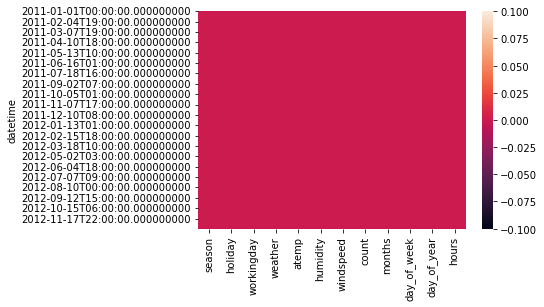

In [30]:
sns.heatmap(df.isna())

Text(0, 0.5, 'count')

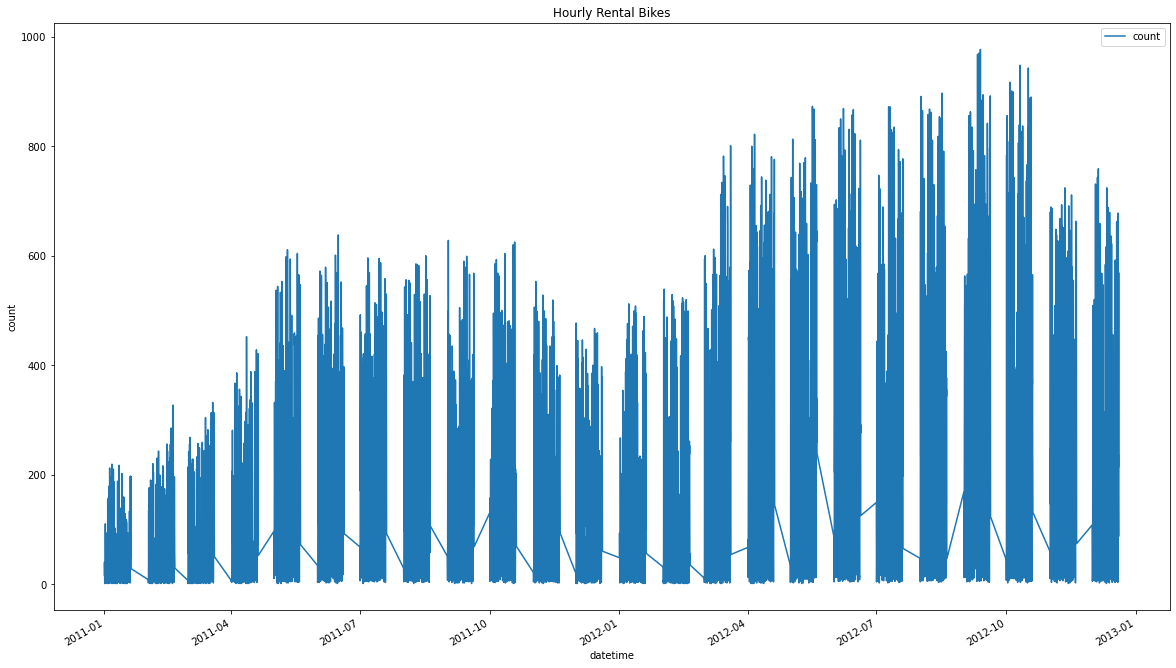

In [31]:
#EDA
df.plot(y='count', figsize=(20,12), title = 'Hourly Rental Bikes')
plt.ylabel('count')

<AxesSubplot:ylabel='Frequency'>

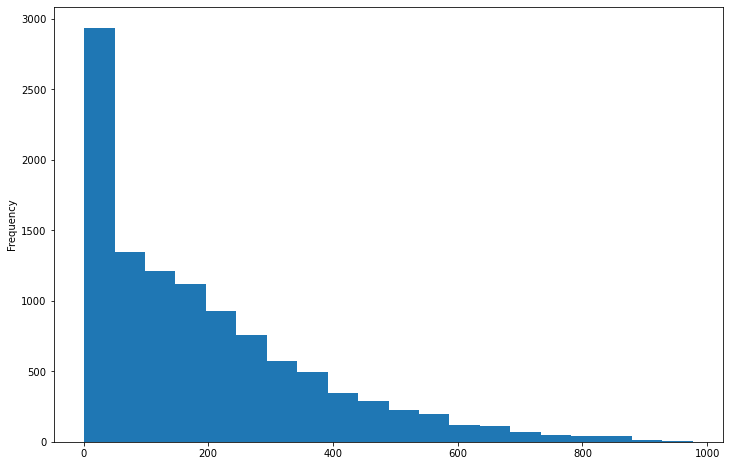

In [32]:
df['count'].plot.hist(bins=20, figsize=(12,8))#distribution of rental bikes

Text(0.5, 1.0, 'Rental Bikes by Month')

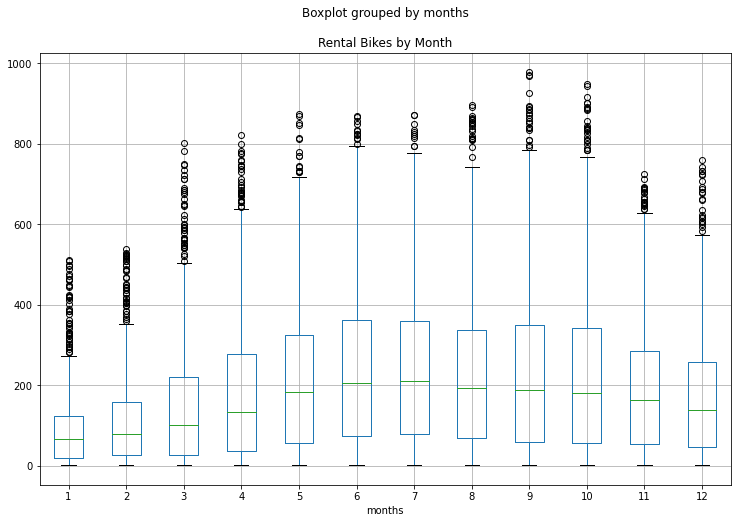

In [33]:
df.boxplot(by='months', column='count', figsize=(12,8))
plt.title("Rental Bikes by Month")

Text(0.5, 1.0, 'Rental Bikes by Season')

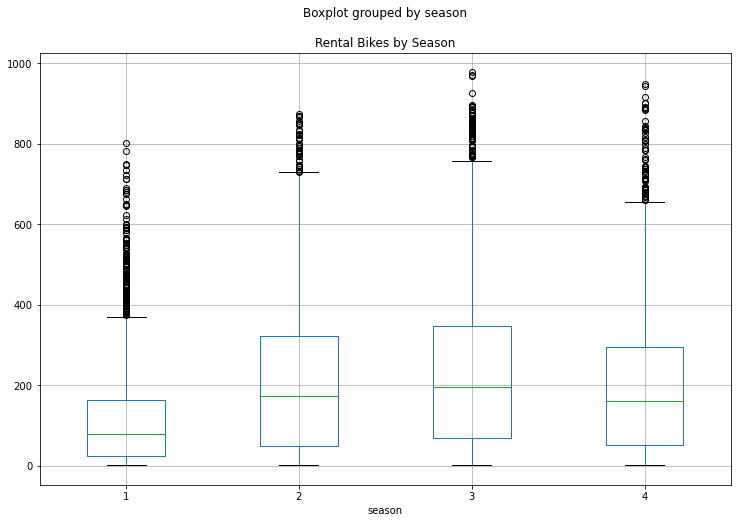

In [34]:
df.boxplot(by='season', column='count', figsize=(12,8))
plt.title("Rental Bikes by Season")

Text(0.5, 1.0, 'Rental Bikes by Season and Working Day')

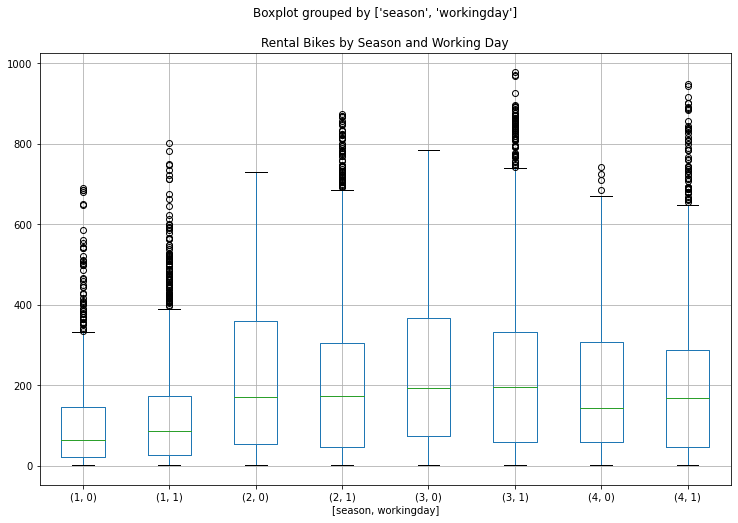

In [35]:
df.boxplot(by=['season','workingday'], column='count', figsize=(12,8))
plt.title("Rental Bikes by Season and Working Day")

In [36]:
df['day_of_month'] = df.index.day

In [37]:
df['hours'] = df.index.hour

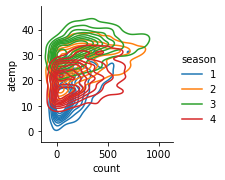

In [38]:
#Kernel density estimator
sns.pairplot(data=df, x_vars=[ 'count'], 
             y_vars=[ 'atemp'], 
             hue='season', kind='kde')

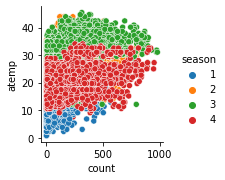

In [39]:
sns.pairplot(data=df, x_vars=['count'], 
             y_vars=['atemp'], 
             hue='season', kind='scatter')

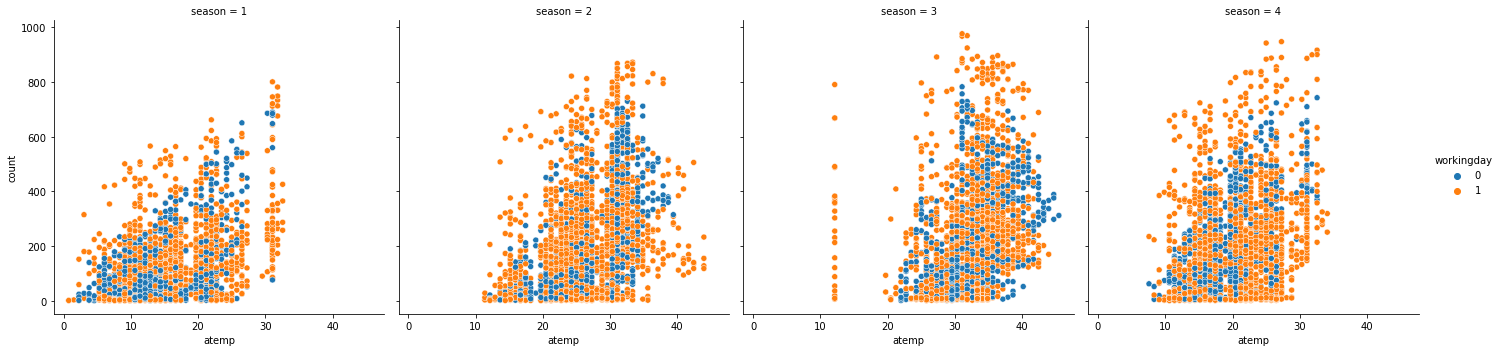

In [40]:
sns.relplot(data=df, x='atemp', y='count', col='season', 
            hue='workingday')

In [41]:
#get the correlation
df.corr()

,holiday,weather,atemp,humidity,windspeed,count,months,day_of_week,day_of_year,hours,day_of_month
holiday,1.000000,-0.007074,-0.005215,0.001929,0.008409,-0.005393,0.001731,-0.191832,0.001134,-0.000354,-0.015877
weather,-0.007074,1.000000,-0.055376,0.406244,0.007261,-0.128655,0.012144,-0.047692,0.011746,-0.022740,-0.007890
atemp,-0.005215,-0.055376,1.000000,-0.043536,-0.057473,0.389784,0.264173,-0.040235,0.262245,0.140343,0.011866
humidity,0.001929,0.406244,-0.043536,1.000000,-0.318607,-0.317371,0.204537,-0.026507,0.203155,-0.278011,-0.011335
windspeed,0.008409,0.007261,-0.057473,-0.318607,1.000000,0.101369,-0.150192,-0.024804,-0.148062,0.146631,0.036157
count,-0.005393,-0.128655,0.389784,-0.317371,0.101369,1.000000,0.166862,-0.002283,0.168056,0.400601,0.019826
months,0.001731,0.012144,0.264173,0.204537,-0.150192,0.166862,1.000000,-0.002266,0.998616,-0.006818,0.001974
day_of_week,-0.191832,-0.047692,-0.040235,-0.026507,-0.024804,-0.002283,-0.002266,1.000000,-0.002786,-0.002925,-0.011070
day_of_year,0.001134,0.011746,0.262245,0.203155,-0.148062,0.168056,0.998616,-0.002786,1.000000,-0.006735,0.054102
hours,-0.000354,-0.022740,0.140343,-0.278011,0.146631,0.400601,-0.006818,-0.002925,-0.006735,1.000000,0.001132


<AxesSubplot:>

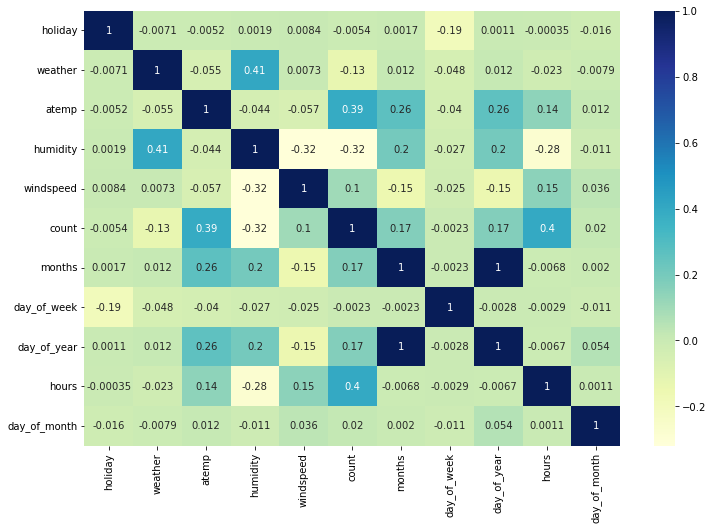

In [42]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")


In [43]:
df.columns

Index(['season', 'holiday', 'workingday', 'weather', 'atemp', 'humidity',
       'windspeed', 'count', 'months', 'day_of_week', 'day_of_year', 'hours',
       'day_of_month'],
      dtype='object')

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier

In [45]:
from sklearn.linear_model import LinearRegression
X1 = df[['season', 'holiday', 'workingday', 'weather', 'atemp', 'humidity',
       'windspeed','months', 'day_of_week', 'day_of_year', 'hours',
       'day_of_month']]
y1 =df['count']       

In [46]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, test_size=0.25, random_state = 42)

In [47]:
X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape

((8164, 12), (2722, 12), (8164,), (2722,))

In [48]:
# Create Features using OneHot Encoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline

In [49]:
#Define proceeding for numerical columns
cat_pipe = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(sparse=False, handle_unknown='ignore'))

In [50]:
num_pipe=make_pipeline( MinMaxScaler())

In [51]:
ct=ColumnTransformer([
    ('cat_preprocessing', cat_pipe, ['hours','season','workingday','day_of_week','day_of_year','weather','day_of_month']),
    ('num_preprocessing', num_pipe, [ 'atemp','holiday','months','windspeed']),
    ('median_imputer', SimpleImputer(strategy='median'), ['humidity' ]),
],remainder='drop')
ct

ColumnTransformer(transformers=[('cat_preprocessing',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['hours', 'season', 'workingday',
                                  'day_of_week', 'day_of_year', 'weather',
                                  'day_of_month']),
                                ('num_preprocessing',
                                 Pipeline(steps=[('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['atemp', 'holiday', 'months', 'windspeed']),
                                ('median_imputer',
                                 Sim

In [52]:
X_train_preprocess=ct.fit_transform(X1_train)
#add this to polynomial expansion

In [53]:
X1_train.shape

(8164, 12)

In [54]:
X_train_preprocess.shape

(8164, 303)

In [55]:
X_test=ct.transform(X1_test)

In [56]:
model1 = LinearRegression().fit(X_train_preprocess,y1_train)

In [57]:
model1.score(X_train_preprocess,y1_train)

0.7015873977091405

In [58]:
pred1 = model1.predict(X_test)
pred1

array([200.12646484, -42.22216797, 356.25244141, ...,  -1.95166016,
       381.80517578, 152.43798828])

In [59]:
y1_test

datetime
2011-07-19 11:00:00    127
2012-01-16 06:00:00     13
2011-12-11 18:00:00    163
2012-08-15 10:00:00    233
2012-06-15 23:00:00    222
                      ... 
2011-03-19 15:00:00    313
2012-01-08 16:00:00    314
2011-07-11 05:00:00     26
2011-07-16 08:00:00    127
2011-01-01 12:00:00     84
Name: count, Length: 2722, dtype: int64

In [60]:
#polynomial expansion
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2,interaction_only=True, include_bias=False)
poly.fit(X_train_preprocess)
X_with_poly = poly.transform(X_train_preprocess)

In [61]:
model2 = LinearRegression().fit(X_with_poly, y1_train)

In [62]:
model2.score(X_with_poly, y1_train)

In [63]:
#Overfitting Check
#model2.score(X_with_poly, y1_train)#already calculated above 
#model2.score(X1_test,y1_test)


In [64]:
#Test work for overfitting
X_test_preprocess=ct.transform(X1_test)

In [65]:
poly1 = PolynomialFeatures(degree=2,interaction_only=True, include_bias=False)
poly1.fit(X_test_preprocess)
X_with_poly2 = poly1.transform(X_test_preprocess)

In [66]:
#model2.score(X_with_poly2,y1_test)

In [67]:
model1.fit(X_train_preprocess,y1_train)

LinearRegression()

In [68]:
X1_train

,season,holiday,workingday,weather,atemp,humidity,windspeed,months,day_of_week,day_of_year,hours,day_of_month
datetime,,,,,,,,,,,,
2011-07-11 00:00:00,3,0,1,1,32.575,65,12.9980,7,0,192,0,11
2012-05-18 22:00:00,2,0,1,1,26.515,52,22.0028,5,4,139,22,18
2011-04-01 23:00:00,2,0,1,1,15.910,61,6.0032,4,4,91,23,1
2012-09-16 09:00:00,3,0,0,1,27.275,60,8.9981,9,6,260,9,16
2011-02-01 23:00:00,1,0,1,3,9.850,93,12.9980,2,1,32,23,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2012-01-14 02:00:00,1,0,0,1,8.335,47,11.0014,1,5,14,2,14
2011-12-10 09:00:00,4,0,0,1,12.880,61,19.0012,12,5,344,9,10
2011-12-18 16:00:00,4,0,0,1,13.635,48,16.9979,12,6,352,16,18


In [69]:
#model1.fit(X1_train, y1_train)

In [70]:
#round(model1.score(X_train_preprocess, y1_train),3)

In [71]:
#round(model1.score(X_test, y1_test),3)

In [72]:
#Regularization
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

In [73]:
lasso = Lasso()
ridge = Ridge()
elast = ElasticNet()

In [74]:
lasso.fit(X_with_poly, y1_train)

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 794564.3350444064, tolerance: 26785.13034380206
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [75]:
ridge.fit(X_with_poly, y1_train)

Ridge()

In [76]:
elast.fit(X_with_poly, y1_train)

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10087189.750697918, tolerance: 26785.13034380206
  model = cd_fast.enet_coordinate_descent(


ElasticNet()

In [77]:
#y_lasso = lasso.predict(X_with_poly)

In [78]:
y_ridge = ridge.predict(X_with_poly)

In [79]:
ridge.score(X_with_poly,y1_train)

0.9675329090775294

In [80]:
ridge.score(X_with_poly2,y1_test)

0.8656704862372155

In [81]:
ylog_train = np.log1p(y1_train)
ylog_test = np.log1p(y1_test)

In [82]:
y_pred=ridge.predict(X_with_poly2)

In [83]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error

In [84]:
print(f'R^2: {round(r2_score(y1_test, y_pred),5)}')
print(f'MSE: {round(mean_squared_error(y1_test, y_pred),2)}')
print(f'MAE: {round(mean_absolute_error(y1_test, y_pred),2)}')
#print(f'RMSLE: {round(mean_squared_log_error(y1_test, y_pred),5)}')

R^2: 0.86567
MSE: 4407.89
MAE: 49.61


In [85]:
#y_elast = elast.predict(X_with_poly)

In [86]:
#lasso.coef_

In [87]:
#df[df.index<'2011-01-02']['count'].sum()